# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [30]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# How CNN's Work
First lets go over what a convolution is. I will go over very basics in this notebook but if you want to read more I have a notebook on my github show casing what convolutions are and do. The notebook can be found [here](https://github.com/GaelGil/notebooks/blob/master/convolutions/convolutuionExample.ipynb). A convolution is when

So what our model is doing is passing a kernel over the image to get another image. This is what a convolution is. 

Feature extraction. During convolutions the filter is picking up on things from the image. For example lets say we have a photo of a the letter `X`. The filter would pick the diagonal lines on the image. During the convolution the filter would pick that up and pass it forward. This is feature extraction. The convolutions are getting us our features for us. This means that the convolutions are telling us what in this photo is significant. If we had an image of the letter `O`. The kernels would pick up on the curves of the letter and pass those forward. This will help us learn what is important in the `O`. Therefore getting us features which are important for our model to make a prediction. Features are data. For example in mnist our features are all the pixels in the image. In the .... dataset the is our features. So what convolutions do is get those for us. 

Once we have these features what do we do with them? Once we have the features what we do is pass them through a fully connected neural network. We feed the features forward to get an output. To learn more about fully connected networks check out my notebook on [github](https://github.com/GaelGil/notebooks/blob/master/back-propagation/back_propagation.ipynb). It goes over feeding forward and back propagation. That is how we go from image to a prediction. One way to think about it is using mnist. 
- What is convolution
- What is a filter/kernel
- Max/Min pooling
- How do we get prediction

In [36]:
# check for our gpu
torch.cuda.is_available()

True

In [21]:
# path to the data
PATH = './data/PetImages'

In [22]:
import cv2
import imghdr
from PIL import Image

In [33]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [35]:
for image_class in os.listdir(PATH): 
    for image in os.listdir(os.path.join(PATH, image_class)):
        image_path = os.path.join(PATH, image_class, image)
        try: 
            im = Image.open(image_path)
            rgb_im = im.convert('RGB')
            rgb_im.save(f'{image_path[:-4]}.jpg')
            tip = imghdr.what(image_path)
            if tip not in image_exts : 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image ./data/PetImages/Dog/11702.jpg
Issue with image ./data/PetImages/Dog/Thumbs.db
Issue with image ./data/PetImages/Cat/Thumbs.db
Issue with image ./data/PetImages/Cat/666.jpg


# Loading and Formating the Data
- create a dataframe
- split into train test and validate
- format the data

In [37]:
data = tf.keras.utils.image_dataset_from_directory(PATH)

Found 24911 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [39]:
batch = data_iterator.next()

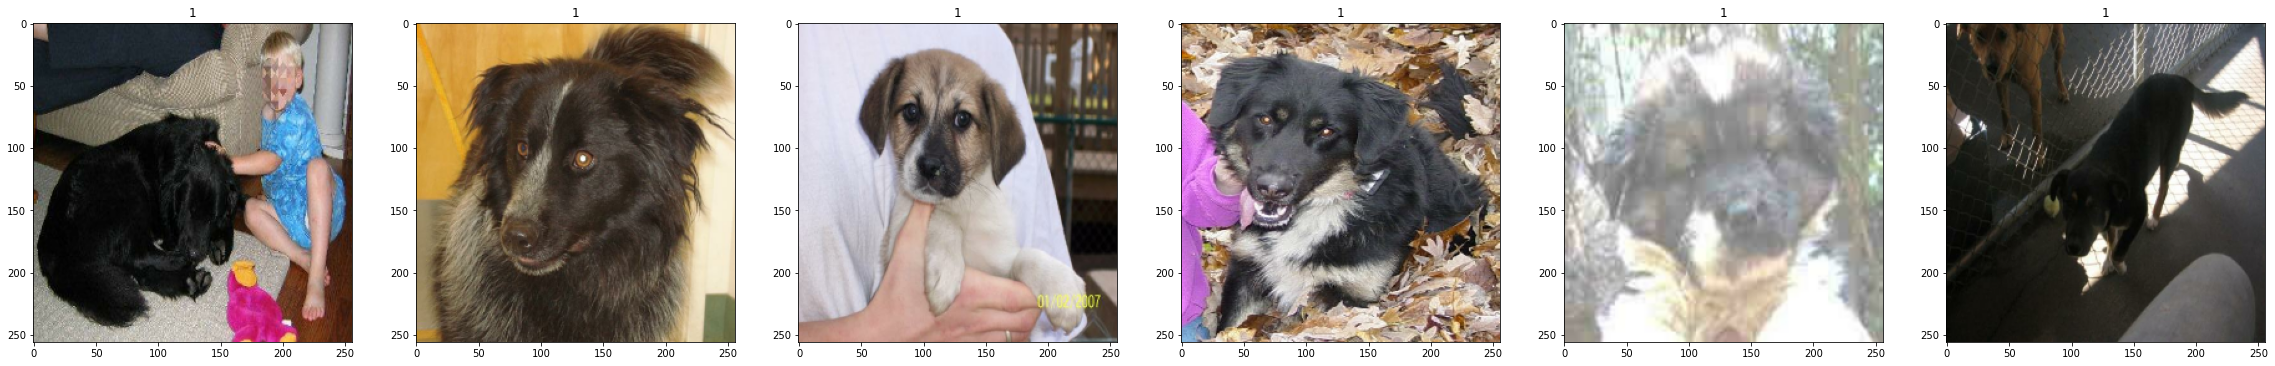

In [40]:
fig, ax = plt.subplots(ncols=6, figsize=(40,40))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Creating the Model

In [37]:
class Net(nn.Module):
    def __init(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(1, 32, 3, 1)
        self.conv3 = nn.Conv2d(1, 32, 3, 1)
        self.fc1 = nn.Linear(input, output)
        self.fc2 = nn.Linear(input, 1)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [38]:
def train(model, data, epochs, lr):
    """
    Function to train our neural network.
    Parameters:
    -----------
    model : class
        The model we are trying to train.
    data : 
        The data for training.
    epochs : int
        How many iterations of training we are going to do.
        
    lr : float
        The learning rate of our model
    """
    net = model()

In [27]:
train(model=Net, PATH, epochs=20,  lr=0.001)

# Analyzing Performence

# What Does the CNN See?